In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Latex
plt.style.use('rose-pine-moon')
%matplotlib inline

### Directional Derivatives and the Gradient 

#### Directional Derivatives

Suppose $z = f(x, y)$ is a function of two variables with a domain of $D$. Let $(a, b) \in D$ and define $\overrightarrow{u} = \cos\theta \hat{i} + \sin\theta \hat{j}$. Then the direction derivative of f in the direction of $\overrightarrow{u}$ is given by:
$$ D_{\overrightarrow{u}}f(a, b) = \lim\limits_{h\to 0} \frac{f(a+h\cos\theta, b+h\sin\theta) - f(a,b)}{h}$$

In [2]:
theta = np.arccos(3/5)
x, y, h = sp.symbols('x y h')
f = x**2 - x*y + 3*y**2

f_directional = f.subs({x:x+h*sp.cos(theta), y:y+h*sp.sin(theta)})
directional_derivative = sp.limit((f_directional - f)/h, h, 0)

In [3]:
du = sp.lambdify([x,y], directional_derivative)

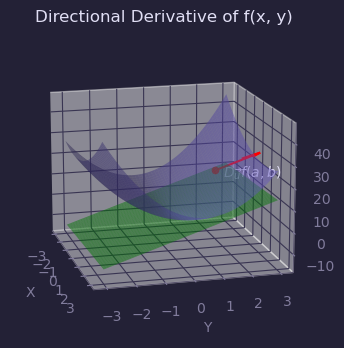

In [4]:
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z = lambda x,y : x**2 - x*y + 3*y**2
p0 = [-1, 2, z(-1, 2)]
du0 = np.array([-1, 2, du(0.6, 0.8)])

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')

# surface plot of f(x, y)
ax.plot_surface(x, y, z(x, y), alpha=0.5, color='slateblue', label='$f(x)$')

# surface plot of tangent plane f  at (x0, y0)
ax.plot_surface(x, y, du(x, y), alpha=0.5, color='green', label='$')

# directional derivative
ax.scatter(p0[0], p0[1], p0[2], color='red')
ax.quiver(p0[0], p0[1], p0[2], du0[0], du0[1], du0[2], color='red')

# text helpers
ax.text(0, 2, p0[2], r'$D_{\overrightarrow{u}}f(a, b)$')

# figure properties
ax.view_init(azim=-15, elev=15)
ax.set_title('Directional Derivative of f(x, y)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

**Directional derivatives in terms of partials:** 
$$D_{\overrightarrow{u}}f(x, y) = f_x(x, y)\cos\theta + f_y(x, y)\sin\theta$$

In [5]:
x, y = sp.symbols('x y')
f = x**2 - x*y + 3*y**2
du = sp.diff(f, x)*sp.cos(theta) + sp.diff(f, y)*sp.sin(theta)
du

0.4*x + 4.2*y

### Gradient

Let $z = f(x, y)$ be a function of $x$ and $y$ such that $f_x$ and $f_y$ exsist. The vector $\nabla f(x, y)$ is called the gradient of f and defined as:
$$ \nabla f(x, y) = f_x(x, y) \hat{i} + f_y(x, y)\hat{j}$$

In [6]:
x, y = sp.symbols('x y')
f = sp.sin(3*x)*sp.cos(3*y)
f_grad  = [sp.diff(f, x), sp.diff(f, y)]
f_grad

[3*cos(3*x)*cos(3*y), -3*sin(3*x)*sin(3*y)]

If angle between $\nabla f(x_0, y_0)$ and $\overrightarrow{u} = (\cos\theta) \hat{i} + (\sin\theta) \hat{j}$ is $\phi$, then directional derivative simplifies to:
$$D_{\overrightarrow{u}}f(x, y) = \nabla f(x_0, y_0)\cdot \overrightarrow{u} = \lVert \nabla f(x_0, y_0)\rVert \lVert u \rVert \cos\phi = \lVert \nabla f(x_0, y_0) \rVert \cos\phi$$

Properties of Gradients:
- If $\nabla f(x_0, y_0) = 0$ then direction vector $D_{\overrightarrow{u}}f(x, y)  = 0 $ for any unit vector u.
- If $\nabla f(x_0, y_0) \neq 0$ then direction vector $D_{\overrightarrow{u}}f(x, y)$ is **maximized** when *u* points in same direction as the gradient. The maximum value of direction vector is $\lVert \nabla f(x_0, y_0)\rVert$.
- If $\nabla f(x_0, y_0) \neq 0$ then direction vector $D_{\overrightarrow{u}}f(x, y)$ is **minimized** when *u* points in opposite direction to the gradient. The minimum value of direction vector is $ - \lVert \nabla f(x_0, y_0)\rVert$.

In [ ]:
p0 = [-2, 3]
x, y = sp.symbols('x y')
f = 3*x**2 - 4*x*y + 2*y**2
f_grad = [sp.diff(f, x), sp.diff(f, y)]
f_grad0 = sp.Matrix([i.subs({x:p0[0], y:p0[1]}) for i in f_grad])
print(f'Maximum gradient vector at P({p0}): {f_grad0}')
print(f'Magnitude of maximum gradient vector at P({p0}):')
display(sp.sqrt(f_grad0.dot(f_grad0)))

Maximum gradient vector at P([-2, 3]): Matrix([[-24], [20]])
Magnitude of maximum gradient vector at P([-2, 3]):


4*sqrt(61)

#### Gradients and Level Curves

Consider the following:
- Let $f$ be a function of $(x(t), y(t))$, then the vector $x'(t)\hat{i} + y'(t)\hat{j}$ is a tangent to curve for every $t$ in the domain. <br><br>
- Let $f(x, y)$ is differentiable at $x_0, y_0$, then by chain rule we can write:<br><br>
$f'(x,y) = f_x(x(t), y(t))x'(t) + f_y(x(t), y(t)y'(t))$ <br><br>
- Consider a level curve $f(x,y) = k$. so the above equation simplifies to:<br><br>
$ f_x(x(t), y(t))x'(t) + f_y(x(t), y(t)y'(t)) = 0  \\
\Rightarrow \nabla f(x,y)\cdot \langle x'(t), y'(t) \rangle = 0
$ <br><br> 
Since the dot product is 0, these two vectors must be orthogonal. However, the second vector is tangent to the level curve, which implies the **gradient must be normal to the level curve as well as tangent**.

In [8]:
def f(x, y, return_grad = False):
    if return_grad is False:
        return 2*x**2 - 3*x*y + 8*y**2 + 2*x - 4*y - 14
    else:
        return [4*x - 3*y + 2, -3*x + 16*y - 4]
    

x, y = sp.symbols('x,y')
f = 2*x**2 - 3*x*y + 8*y**2 + 2*x - 4*y - 14
p0 = [-2, 1]

f_grad = [sp.diff(f, x), sp.diff(f, y)]
f_grad_p0 = [i.subs({x:p0[0], y:p0[1]}) for i in f_grad]

# getting orthogonal vector to grad(f), i.e grad(fx).x0 + grad(fy).y0 = 0
f_tangent_p0 = sp.Subs(sp.solve(f_grad_p0[0]*x + f_grad_p0[1]*y)[0], y, p0[1]).doit()
f_tangent_p0 = [float(list(f_tangent_p0.values())[0]), p0[1]]

print(f'Gradient at P{p0} : {f_grad_p0}\nTangent at P{p0}: {f_tangent_p0}')

Gradient at P[-2, 1] : [-9, 18]
Tangent at P[-2, 1]: [2.0, 1]


Tangent is mannually obtained as for any vector $u = x\hat{i} + y\hat{j}$ , vector $v = -y\hat{i} + x\hat{j}$ is orthogonal to $u$ or $u\cdot v = 0$

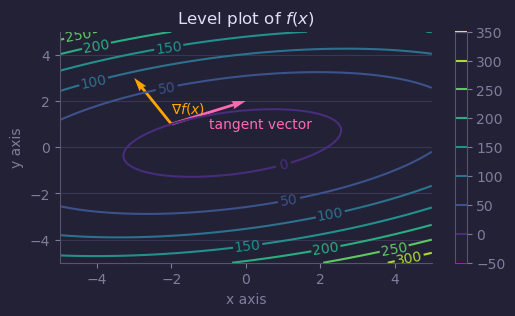

In [9]:
def f(x, y):
    return 2*x**2 - 3*x*y + 8*y**2 + 2*x - 4*y - 14

t = np.linspace(-5, 5, 100)
x, y = np.meshgrid(t, t)

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)

# contour plot
contours = ax.contour(x, y, f(x, y))
ax.clabel(contours)
fig.colorbar(contours, ax = ax, orientation='vertical')

# scaled version gradient (1/9) for visualisation
# arbitary tangent with direction calculated mannually by finding vector orthogonal to gradient
ax.quiver(p0[0], p0[1], -1, 2, color='orange',  angles='xy',  scale=1, scale_units='xy')
ax.quiver(p0[0], p0[1], f_tangent_p0[0], f_tangent_p0[1], color='hotpink',  angles='xy',  scale=1, scale_units='xy')

# text helpers
ax.text(-2, 1.5, r'$\nabla f(x)$', color='orange')
ax.text(-1, 0.8, 'tangent vector', color='hotpink')

# figure properties
ax.set_title('Level plot of $f(x)$')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis');

#### Three-Dimensional Gradients and Directional Derivatives

Let $w=f(x,y,z)$ be a function of three variables such that $f_x,f_y, and f_z$ exist. The vector $\nabla f(x,y,z)$ is called the gradient of $f$ and is defined as:
$$ \nabla f(x, y, z) = f_x(x,y,z)\hat{i} + f_y(x,y,z)\hat{j} + f_z(x,y,z)\hat{k}$$  

In [10]:
x, y, z = sp.symbols('x y z')
f = sp.exp(-2*z) * sp.sin(2*x) * sp.cos(2*y)
f_grad  = [sp.diff(f, x), sp.diff(f, y), sp.diff(f, z)]
print(f'Gradient of f (i, j, k):')
for i in f_grad:
    display(i)

Gradient of f (i, j, k):


2*exp(-2*z)*cos(2*x)*cos(2*y)

-2*exp(-2*z)*sin(2*x)*sin(2*y)

-2*exp(-2*z)*sin(2*x)*cos(2*y)

#### Directional Derivative of a Function of Three Variables

Let $\alpha, \beta, \gamma$ be angles, a 3-d unit vector $u$ makes with positive *x-, y- and z-axes*. That is $\cos^2\alpha + \cos^2\beta + \cos^2\gamma = 1$. Then directional derivative is defined as:
<br><br>**In terms of limits:**
$$D_{u}(x_0,y_0,z_0) = \lim\limits_{t\to0} \frac{f(x_0+t\cos\alpha, y_0+t\cos\beta, z_0 + t\cos\gamma)}{t}$$
<br><br>**In terms of gradients:**
$$D_{u}(x_0,y_0,z_0) = \nabla f(x,y,z)\cdot u = f_x(x,y,z)\cos\alpha + f_y(x,y,z)\cos\beta + f_z(x,y,z)\cos\gamma$$

In [11]:
v = sp.Matrix([-1, 2, 2])
u = v / sp.sqrt(v.dot(v))

x, y, z = sp.symbols('x y z')
f = 5*x**2 - 2*x*y + y**2 - 4*y*z + z**2 + 3*x*z

D_v = sp.diff(f, x) * u[0] + sp.diff(f, y) * u[1] + sp.diff(f, z) * u[2]

p0 = [1, -2, 3]
D_v_p0 = D_v.subs({x:p0[0], y:p0[1], z:p0[2]})
print('Directional Derivative')
display(D_v)
print(f'Directional derivative at P{p0}:')
display(D_v_p0)

Directional Derivative


-8*x/3 - 2*y/3 - 7*z/3

Directional derivative at P[1, -2, 3]:


-25/3

### Taylor Polynomials

#### Taylor Polynomials for Functions of Two Variables

Recalling for a polynomial *f* with one variable. Let it have *n* derivatives at point c, the polynomial can approximatd as:
$$ P_n(x) = f(c) + f'(c)(x-c) + \frac{f''(c)}{2!}(x-c)^2 + \dots + \frac{f^{(n)}(c){n!}}(x-c)^n $$
Generally higher order terms are ignored and this leads to a **linear apporximation**:
$$f(x) \approx f(c) + f'(c) (x-c)$$

Now consider a function of two variables $f(x,y)$ whose partial exsist at the point (a,b), then the *first-degree appoximation* is given by:
$$f(x,y) \approx L(x, y) = f(a, b) + f_x(a, b)(x-a) + f_y(a, b)(y-b)$$
Here $L(x,y)$ is also know as **tangent plane approximation** of *f* for (x, y) near the point (a,b).
<br><br>Similarly a **second-degree approximation** is given as:
$$f(x,y) \approx Q(x, y) = f(a, b) + f_x(a, b)(x-a) + f_y(a, b)(y-b) + \\[1em] 
\frac{f_{xx} (a,b)}{2}(x-a)^2 + f_{xy}(a,b)(x-a)(y-b) + \frac{f_{yy} (a,b)}{2}(y-b)^2$$
Note: $f_xy = f_yx$, therefore the 2 cancels out.

In [12]:
x, y = sp.symbols('x y')
f = sp.sin(2*x) + sp.cos(y)
p0 = [0, 0]

fx = sp.diff(f, x)
fy = sp.diff(f, y)
fxx = sp.diff(fx, x)
fxy = sp.diff(fx, y)
fyy = sp.diff(fy, y)

L = f.subs({x:p0[0], y:p0[1]}) + fx.subs({x:p0[0], y:p0[1]}) * (x-p0[0]) + fy.subs({x:p0[0], y:p0[1]}) * (y-p0[1])
Q = L + 0.5* fxx.subs({x:p0[0], y:p0[1]}) * (x-p0[0])**2 + fxy.subs({x:p0[0], y:p0[1]}) * (x-p0[0])*(y-p0[1]) + 0.5* fyy.subs({x:p0[0], y:p0[1]}) * (y-p0[1])**2 
print(f'First order apporximation at P{p0}')
display(L)
print(f'Second order apporximation at P{p0}')
display(Q)

First order apporximation at P[0, 0]


2*x + 1

Second order apporximation at P[0, 0]


2*x - 0.5*y**2 + 1

In [13]:
f = sp.lambdify([x, y], f)
L = sp.lambdify([x, y], L)
Q = sp.lambdify([x, y], Q)

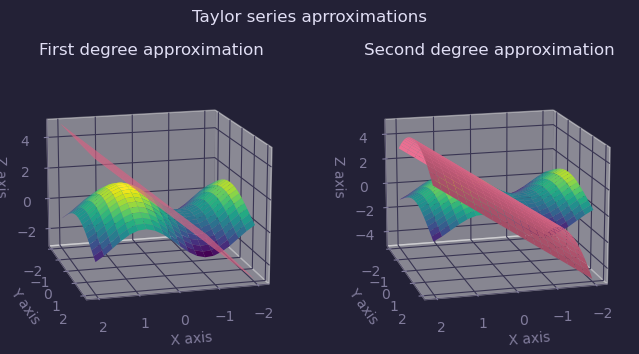

In [14]:
x, y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
approximations = [L(x, y), Q(x, y)]

titles = ['First degree approximation', 'Second degree approximation']
fig = plt.figure(figsize=(8, 4))

fig.suptitle('Taylor series aprroximations')

for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    
    # function f(x, y) surface plot
    ax.plot_surface(x, y, f(x, y), cmap='viridis')
    
    # n-th order taylor series approximation surface plot
    ax.plot_surface(x, y, approximations[i])
    
    # figure properties
    ax.view_init(azim=75, elev=15)
    ax.set_title(titles[i])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

Visually it can be verified that higher order taylor series approximations are better approximation of the function.

#### Higher-Degree Taylor Polynomials of a Function of Two Variables

Genrallising the above formual in a summation form allows us to express a nth-degree Taylor polynomial as:
$$P_n(x, y) = \displaystyle\sum_{i=0}^n  \displaystyle\sum_{j=0}^{n-i} \frac{\frac{d^{(i+j)} f(a,b)}{\partial x^i \partial y^i}} {i!j!} (x-a)^i(y-b)^j$$

In [15]:
def taylor_series_expansion(f, x, y, p0, order):
    P = 0
    for i in range(order+1):
        for j in range(0, order-i+1):
            num = sp.diff(sp.diff(f, x, i), y, j)
            num = num.subs({x:p0[0], y:p0[1]})
            den = math.factorial(i) * math.factorial(j)
            var = ((x - p0[0])**i) * ((y-p0[0])**j)
            P += sp.Mul(num, den**-1) * var
    return P

In [16]:
order = 3
x, y = sp.symbols('x y')
f  = sp.sin(2*x) + sp.cos(y)
p0 = [0, 0]
P3 = taylor_series_expansion(f, x, y, p0, 3)
f = sp.lambdify([x, y], f)
P3 = sp.lambdify([x, y], P3)

Text(0.5, 0, 'Z axis')

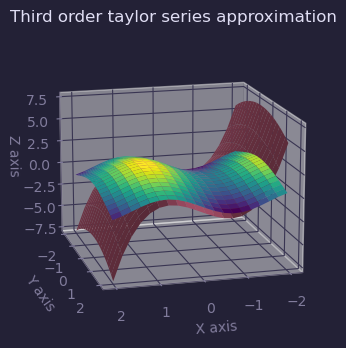

In [17]:
x, y = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1, projection='3d')
# surface plot of f(x,y)
ax.plot_surface(x, y, f(x, y), cmap='viridis')

# surface plot of 3rd-order taylor series approximation 
ax.plot_surface(x, y, P3(x, y))

# figure properties
ax.view_init(azim=75, elev=15)
ax.set_title('Third order taylor series approximation')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

### Critical Points

Let function of two variable f(x, y) be differentiable on open set containing the point $(x_0, y_0)$. The point is called a critical point if one of the two following condition holds:
1. $f_x(x_0, y_0) = f_y(x_0, y_0) = 0$
2. Either $f_x(x_0, y_0)$ or $f_y(x_0, y_0)$ does not exsist.

In [18]:
x, y = sp.symbols('x,y')
f = x**2 + 2*x*y - 4*y**2 + 4*x - 6*y + 4
fx = sp.diff(f, x)
fy = sp.diff(f, y)
display(fx, fy)

2*x + 2*y + 4

2*x - 8*y - 6

In [19]:
print(f'critical points : {sp.solve([fx, fy], [x, y])}')

critical points : {x: -1, y: -1}


#### Determining Global and Local Extrema

Let there be a two variable function f(x, y) that is defined and continuous on an open set containing the point $(x_0, y_0)$, then :
- $f$ is **local maximum** at $(x_0, y_0)$ if $f(x_0, y_0) \geq f(x, y)$ for all points within the disk centered at $(x_0, y_0)$.
- $f$ is **global maximum** if $f(x_0, y_0) \geq f(x, y)$  for all points in domain of $f$.
- $f$ is **local minimum** at $(x_0, y_0)$ if $f(x_0, y_0) \leq f(x, y)$ for all points within the disk centered at $(x_0, y_0)$.
- $f$ is **global minimum** if $f(x_0, y_0) \leq f(x, y)$  for all points in domain of $f$.

If $(x_0, y_0)$ is either a local maximum or minimum value, then it is called a **local extremum**.

*Fermat’s Theorem for Functions of Two Variables*:<br><br>
For f(x, y) two varibale function that is defined and continuous on an open set containing the point $f(x_0,y_0)$:
-  if $f_x$ and $f_y$ exsist at $(x_0,y_0)$
- and if $f(x_0,y_0)$ is a local extremum point, then $(x_0,y_0)$ is also a **critical point** of f.

#### Saddle Point

Given the function $z=f(x,y)$, the point $(x_0,y_0,f(x_0,y_0))$ is a saddle point if
- $f_x(x_0,y_0)=0$ 
- $f_y(x_0,y_0)=0$,
- but $f$ does not have a local extremum at $(x_0,y_0)$.

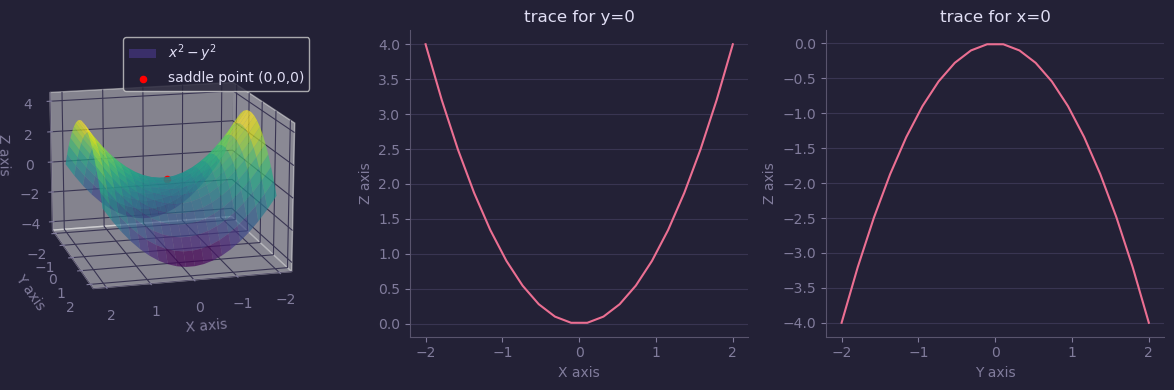

In [20]:
t = np.linspace(-2, 2, 20)
x, y = np.meshgrid(t, t)
z = lambda x,y: x**2 - y**2

fig = plt.figure(figsize=(12, 4), tight_layout=True)
ax = fig.add_subplot(1, 3, 1,projection='3d')

# surface plot of function f(x, y)
ax.plot_surface(x, y, z(x, y), cmap='viridis', alpha=0.7, label=r'$x^2-y^2$')

# scattering saddle point
ax.scatter(0, 0, 0, color='red', label='saddle point (0,0,0)')

# figure properties
ax.legend()
ax.view_init(azim=75, elev=15)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


# Trace subplots
titles = ['trace for y=0', 'trace for x=0']
for i in range(2):
    ax = fig.add_subplot(1, 3, i+2)
    ax.plot(t, (-1)**i * t**2)
    ax.set_title(titles[i])
    if i == 0:
        ax.set_xlabel('X axis')
        ax.set_ylabel('Z axis')
    elif i == 1:
        ax.set_xlabel('Y axis')
        ax.set_ylabel('Z axis')

Consider $f(x,y) = x^2 - y^2$. From above graphs we observe:
- Origin is a *saddle point* for f(x, y).
- Origin is *global minimum* for trace corresponding to y=0.
- Origin is *global maximum* for trace corresponding to x=0.

#### Classifying Critical Points

We first try to deal with a simple example of quadratic polynomial functions of two variable at their critiacl points. <br><br>
A quadratic polynomial in two variables take one of the following forms:
1. $z = x^2 + y^2$, which opens up and has an absolute minimum at its vertex.
2. $z = - (x^2  + y^2)$, which opens down and has an absolute maximum at its vertex.
3. $z = x^2 - y^2$ or $z = -x^2 + y^2$, producing a saddle point at its critical point as seen above.

In [21]:
x, y = sp.symbols('x,y')
f = x**2 - 6*x + y**2 + 10*y + 20

fx = sp.diff(f, x)
fy = sp.diff(f, y)

display(fx, fy)

2*x - 6

2*y + 10

In [22]:
xc = sp.solve(fx, x)
yc = sp.solve(fy, y)
print(f'critiacl point: {xc, yc}')

critiacl point: ([3], [-5])


We notice both $x^2$ and $y^2$ have positive magnitude which implies it is a paraboloid that opens up with an absolute minimum.
Simiplfying $f(x,y)$ mannualy:
$$
\begin{align*}
f(x,y) 
&=  x^2 - 6x + y^2 + 10y + 20 \\[1em]
&= x^2 - 6x + 9 + y^2 + 10y + 25 + 20 - 9 - 25 \\[1em]
&= (x-3)^2 + (y+5)^2 - 14
\end{align*}
$$
Since the square quantities are $\geq 0$, the minimum value is 14. This can also be obtained by subsitutting the critical point in orignal fucntion.

In [23]:
f.subs({x:3, y:-5})

-14

#### Second Partials Test

##### Derivation

Consider the quadratic approxiamtion to function $z = f(x, y)$ centered at a critical point $(x_0, y_0)$:
$$ 
\begin{align*}
Q(x, y) &= f (x_0, y_0) + f_x(x_0, y_0) (x - x_0) + f_y(x_0, y_0) (y - y_0) + \\[1em]
& \frac{f_{xx}(x_0, y_0)}{2}(x-x_0)^2 + f_{xy}(x_0, y_0)(x-x_0)(y-y_0) + \frac{f_{yy}(x_0, y_0)}{2}(y-y_0)^2
\end{align*}
$$
Since $(x_0, y_0)$ is critical point of f, we know that $f_x(x_0, y_0) = 0$ and $f_y(x_0, y_0) = 0$. This simplifies above equation as:
$$
Q(x, y) = f (x_0, y_0) + \frac{f_{xx}(x_0, y_0)}{2}(x-x_0)^2 + f_{xy}(x_0, y_0)(x-x_0)(y-y_0) + \frac{f_{yy}(x_0, y_0)}{2}(y-y_0)^2
$$

Now we need to complete the square on this quadratic polynomial in two variables to learn how we can classify the behavior of this function at this critical point. Remember that the original function will share the same behavior (max, min, saddle point) as this 2nd-degree Taylor polynomial at this critical point.

<br><br>
Let us assume $u = x-x_0$ and $v = y-y_0$ and let
$$
\begin{align*} 
a &= \frac{f_{xx}(x_0, y_0)}{2} \\ b &= f_{xy}(x_0, y_0) \\ c &= \frac{f_{yy}(x_0, y_0)}{2} \\ d &= f (x_0, y_0) 
\end{align*}
$$
Then we need to complete the square on the polynomial:
$$ 
\begin{align*} 
Q(x,y) &= au^2 +buv + cv^2 + d 
&= a\left[ u^2 + \frac{b}{a}uv + \frac{c}{a}v^2\right] + d \\
&= a\left[ \left(u^2 + \frac{b}{a}uv  + \left(\frac{b}{2a}v\right)^2\right)   + \frac{c}{a}v^2 - \left(\frac{b}{2a}v\right)^2 \right] + d \\
&= a\left[ \left(u+ \frac{b}{2a}v\right)^2   + \left(\frac{4ac-b^2}{4a^2}\right)v^2 \right] + d
\end{align*}
$$
- Note in the above expression the term $4ac-b^2$ dictates the sign of coefficent of $v^2$ which also repsonsible for the shape of function.
- As it helps discriminate between behaviour at critical point it is called the *discriminant*, $D = 4ac-b^2$.

<br><br>
Now let us consider the possible values of D.<br><br>
If $D = 4ac-b^2 \geq 0$ then coefficent of $v^2$ is positive along with $u^2$:
- if $a = 0.5 f_{xx}(x_0,y_0) \geq 0 \Rightarrow c = 0.5f_{yy}(x_0,y_0) \geq 0$ abd the function $f$ open upwards with *local minimum* at critical point.
- if $a = 0.5 f_{xx}(x_0,y_0) \leq 0 \Rightarrow c = 0.5f_{yy}(x_0,y_0) \leq 0$ abd the function $f$ open downwards with *local maximum* at critical point.

If $D = 4ac-b^2 \leq 0$ than either:
- The two squared terms inside the brackets have opposite signs (meaning f is concave up along a line parallel to the x-axis and concave down along a line parallel to the y-axis, or vice-versa).<br>
Other way to look at is either <br> 
$a = 0.5 f_{xx}(x_0,y_0) \geq 0 \Rightarrow c = 0.5f_{yy}(x_0,y_0) \leq 0$ or <br>
 $a = 0.5 f_{xx}(x_0,y_0) \leq 0 \Rightarrow c = 0.5f_{yy}(x_0,y_0) \geq 0$ <br>
 that critical point corresponds to local minimum for one axis and local minimum for other axis.
- $b^2 \geq 4ac$ i.e. $f_{xy}(x_0,y_0) \geq f_{xx}(x_0,y_0), f_{yy}(x_0,y_0)$.  This means that even if the surface is concave up in both x- and y-directions, or concave down in both x- and y-directions, a large mixed partial can offset these and cause the surface to have a saddle point at the critical point.
 

##### Definition

Subsitutting a, b and c values in discrimnant we get:
$$
\begin{align*} 
D(x_0, y_0) &= 4\frac{f_{xx}(x_0, y_0)}{2}\frac{f_{yy}(x_0, y_0)}{2} - \big(f_{xy}(x_0, y_0)\big)^2 \\  &= f_{xx}(x_0, y_0)f_{yy}(x_0, y_0) - \big(f_{xy}(x_0, y_0)\big)^2 
\end{align*}
$$
This formula is called the **Second Partials Test**, and it can be used to classify the behavior of any function at its critical points, as long as its second partials exist there and as long as the value of this discriminate is not zero.

In [24]:
x, y = sp.symbols('x,y')
f = 1/3*x**3 + y**2 + 2*x*y - 6*x - 3*y + 4

fx = sp.diff(f, x)
fy = sp.diff(f, y)
display(fx, fy)

1.0*x**2 + 2*y - 6

2*x + 2*y - 3

In [25]:
c0, c1 = sp.solve([fx,fy], [x,y])
print(f'critical point 0 : {c0}\nciritcal point 1 : {c1}')

critical point 0 : (-1.00000000000000, 2.50000000000000)
ciritcal point 1 : (3.00000000000000, -1.50000000000000)


In [26]:
fxx = sp.diff(f,x,2)
fxy = sp.diff(sp.diff(f, x), y)
fyy = sp.diff(f, y, 2)

display(Latex(r'$f_{xx}$ :'), fxx)
display(Latex(r'$f_{xy}$ :'), fxy)
display(Latex(r'$f_{yy}$ :'), fyy)

<IPython.core.display.Latex object>

2.0*x

<IPython.core.display.Latex object>

2

<IPython.core.display.Latex object>

2

In [27]:
disc = fxx * fyy - fxy**2
D0 = disc.subs({x:c0[0], y:c0[1]})
D1 = disc.subs({x:c1[0], y:c1[1]})
print('Discriminants:',
      f'\ncritical point 0 {c0}: {D0:.2f}',
      f'\ncritical point 1 {c1}: {D1:.2f}')

Discriminants: 
critical point 0 (-1.00000000000000, 2.50000000000000): -8.00 
critical point 1 (3.00000000000000, -1.50000000000000): 8.00


Therefore 
- critical point-0 is a saddle point.
- critical point-1 has a local extremum.

In [28]:
print(f'fxx at c1 : {fxx.subs({x:c1[0], y:c1[1]}):.2f}',
      f'\nfyy at c1 : {fyy.subs({x:c1[0], y:c1[1]}):.2f}')

fxx at c1 : 6.00 
fyy at c1 : 2.00


Since $f_{xx}$ and $f_{yy}$ are both positive that means $f$ opens up with a local minimum. The local minimum is found by substituting critical point in orignal function.

In [29]:
print(f'local minimum of function: {f.subs({x:c1[0],y:c1[1]})}',
      f'\nfunction value at saddle point: {f.subs({x:c0[0],y:c0[1]})}')

local minimum of function: -7.25000000000000 
function value at saddle point: 3.41666666666667


In [30]:
c = np.array(
    [[c0[0], c1[0]], [c0[1], c1[1]],
    [f.subs({x:c0[0],y:c0[1]}), 
    f.subs({x:c1[0],y:c1[1]})]], 
dtype=np.float64)

In [31]:
c

array([[-1.        ,  3.        ],
       [ 2.5       , -1.5       ],
       [ 3.41666667, -7.25      ]])

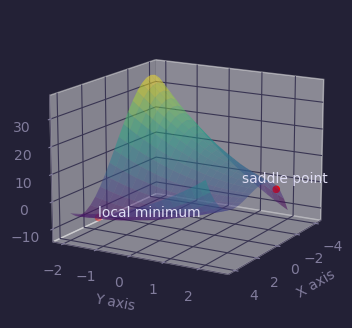

In [32]:
x, y = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-2, 2, 20))
f = lambda x,y :1/3*x**3 + y**2 + 2*x*y - 6*x - 3*y + 4


fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1, projection='3d')

#surface plot of f(x, y)
ax.plot_surface(x, y, f(x, y), cmap='viridis', alpha=0.5)

# scattering critical points
ax.scatter(c[0], c[1], c[2], color='red')

# text helpers
ax.text(c[0,0], c[1,0]-1, c[2,0]+0.2, 'saddle point')
ax.text(c[0,1], c[1,1], c[2,1]+0.2, 'local minimum')

# figure settings
ax.view_init(azim=30, elev=15)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

### Constrained Optimization

#### Extreme Value Theorem

Let $z=f(x,y)$ be a continuous function on a closed, bounded region $S$. Then $f$ has an absolute maximum value at some point in $S$ and an absolute minimum value at some point in $S$.
<br><br> That is we evaluate function at critical points in the region as well as boundaries of the region. The largest value corresponds to *global maximum* while the smallest to *global minimum* on that region.

In [33]:
x, y = sp.symbols('x,y')
f =  x**2 - y**2 + 5
fx = sp.diff(f, x)
fy = sp.diff(f, y)
fxx = sp.diff(f,x,2)
fyy = sp.diff(f,y,2)
fxy = sp.diff(fx,y)

print(f'fx: {fx} | fy : {fy}',
      f'\nfxx: {fxx} | fxy: {fxy} | fyy: {fyy}')

fx: 2*x | fy : -2*y 
fxx: 2 | fxy: 0 | fyy: -2


In [34]:
f = lambda x,y: x**2 - y**2 + 5
S = np.array([[-1,0,2], [-2,1,-2]])

def point_slope_form(t, x, y):
    return (y[1] - y[0])/(x[1] - x[0]) * (t-x[0]) + y[0]

t = np.linspace(-1, 0, 10)
y = point_slope_form(t, (0,-1), (1,-2))
S1 = np.stack([t, y, f(t, y)])

t = np.linspace(0, 2, 10)
y = point_slope_form(t, (0, 2), (1, -2))
S2 = np.stack([t, y, f(t, y)])

t = np.linspace(-1, 2, 10)
y = point_slope_form(t, (-1, 2), (-2, -2))
S3 = np.stack([t, y, f(t, y)])

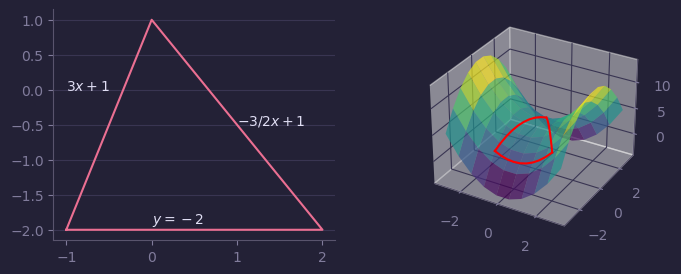

In [35]:
t = np.linspace(-3, 3, 10)
x, y = np.meshgrid(t, t)

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(1,2,1)
ax.plot([-1, 0, 2, -1], [-2, 1, -2, -2])
ax.text(1, -0.5, r'$-3/2x + 1$')
ax.text(-1, 0, r'$3x + 1$')
ax.text(0, -1.9, r'$y=-2$')

ax = fig.add_subplot(1,2,2,projection='3d')

# surface plot of f(x, y)
ax.plot_surface(x,y, f(x, y), cmap='viridis', alpha=0.7)

# plotting bounded region of consideration
for i in (S1, S2, S3):
    ax.plot(i[0], i[1], i[2], color='red')

In [36]:
x, y = sp.symbols('x,y')
f =  x**2 - y**2 + 5
f1 = f.subs({y:-2})
f2 = sp.simplify(f.subs({y:-1.5*x + 1}))
f3 = sp.simplify(f.subs({y:3*x + 1}))

In [37]:
xc1 = sp.solve(sp.diff(f1,x), x)
xc2 = sp.solve(sp.diff(f2,x), x)
xc3 = sp.solve(sp.diff(f3,x), x)

In [38]:
#S = np.array([[-1,0,2], [-2, 1, -2]])
c = []
for i in (-1, 2, xc1[0]):
    print(f'f1({i:.4f},{-2:.4f}) = {f1.subs({x:i}):.4f}')
    c.append([i,-2, f1.subs({x:i})])
print('\n')

for i in (2, 0, xc2[0]):
    print(f'f2({i:.4f},{-1.5*i+1:.4f}) = {f2.subs({x:i}):.4f}')
    c.append([i, -1.5*i+1, f2.subs({x:i})])
print('\n')

for i in (-1, 0, xc3[0]):
    print(f'f3({i:.4f},{3*i + 1:.4f}) = {f3.subs({x:i}):.4f}')
    c.append([i, 3*i+1, f3.subs({x:i})])
c = np.array(c)

f1(-1.0000,-2.0000) = 2.0000
f1(2.0000,-2.0000) = 5.0000
f1(0.0000,-2.0000) = 1.0000


f2(2.0000,-2.0000) = 5.0000
f2(0.0000,1.0000) = 4.0000
f2(1.2000,-0.8000) = 5.8000


f3(-1.0000,-2.0000) = 2.0000
f3(0.0000,1.0000) = 4.0000
f3(-0.3750,-0.1250) = 5.1250


In [39]:
print(
    f'absolute maximum: {np.max(c,0)[-1]:.2f}',
    f'\ncorresponding critical point: {np.max(c,0)[:-1]}',
    f'\n\nabsolute minimum: {np.min(c,0)[-1]:.2f}',
    f'\ncorresponding critical point: {np.min(c,0)[:-1]}',
)


absolute maximum: 5.80 
corresponding critical point: [2 1.0] 

absolute minimum: 1.00 
corresponding critical point: [-1 -2]


#### Method of Least Square Regression

One way to measure how well a particular model $y=f(x)$ fits a given set of data points ${(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)}$ is to consider the squares of the differences between the values given by the model and the actual y-values of the data points. <br><br>

The differences (or errors), $d_i=f(x_i)−y_i$, are squared and added up so that all errors are considered in the measure of how well the model "fits" the data.  This sum of the squared errors is given by:
$$ S = \displaystyle\sum_{i=1}^n(f(x_i) - y_i)^2$$

**Least Squares Regression Line** is given by formula:<br><br>
$f(x) = ax + b$ <br><br>
where<br><br>
$a = \frac{\displaystyle {n \sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}}{\displaystyle{n\sum_{i=1}^n {x_i}^2 - \left( \sum_{i=1}^n x_i \right)^2}} \qquad \text{and} \qquad b = \tfrac{1}{n}\left(\sum_{i=1}^n y_i - a\sum_{i=1}^n x_i \right).$
<br><br> For proof visit: https://math.libretexts.org/Courses/Oxnard_College/Multivariable_Calculus/02%3A_Functions_of_Multiple_Variables_and_Partial_Derivatives/2.10%3A_Constrained_Optimization

In [40]:
u = np.array([[1,4,6,8,9],
              [1,3,4,7,6]])
n = u.shape[-1]
a = (n*np.sum(u[0] * u[1]) - np.sum(u[0]) * np.sum(u[1])) / (n*np.sum(u[0]**2) - np.sum(u[0])**2)
b = 1/n * (np.sum(u[1]) - a * np.sum(u[0]))
e = np.sum((a * u[0] + b - u[1])**2)
print(f'a: {a} | b: {b}\nleast square error: {e}')

a: 0.7135922330097088 | b: 0.2038834951456309
least square error: 1.8203883495145632


Verifying results using least squares solution from linear algebra : $x = (A^TA)^{-1}A^Tb$

In [41]:
A = np.stack([u[0], np.ones_like(u[0])], axis=1)
np.linalg.inv(A.T @ A) @ A.T @ u[1]

array([0.71359223, 0.2038835 ])

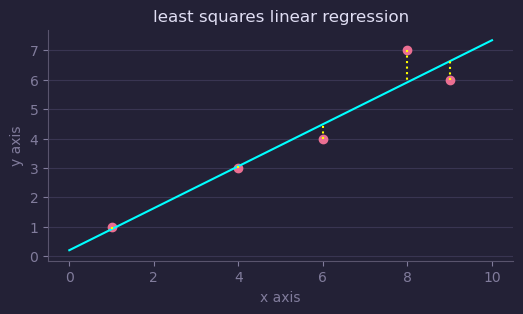

In [42]:
t = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1,1,1)

# scattering data points
ax.scatter(u[0], u[1])

# plotting best fit line
ax.plot(t, a*t + b, color='cyan')

# plotting errors
for i in range(u.shape[1]):
    ax.plot([u[0][i], u[0][i]], [u[1][i], a*u[0][i]+b], ls=':', color='yellow')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title('least squares linear regression');

### Lagrange Multipliers

#### Lagrange Multipliers

- Let $f$ and $g$ be functions of two variables with continuous partial derivatives at every point of some open set containing the smooth curve $g(x,y)=k$, where $k$ is a constant.
- Suppose that $f$, when restricted to point on the curve $g(x, y) = k$ has a local extremum at the point $(x_0, y_0)$ and the point $\nabla g(x_0, y_0) \neq 0$. Then there is a number $\lambda$ called a **Lagrange multiplier**, for which
$$\nabla f(x_0, y_0) = \lambda \nabla g(x_0, y_0)$$

Steps for using Lagrange Multipliers:
1. Determine: *Objective function $f(x,y)$* and *Constraint function $g(x, y)$* .
2. Set up following equations: <br><br>
$ \nabla f(x,y) = \lambda \nabla g(x, y) \\[1em]
g(x,y) = k $
3. Solve for $x$ and $y$ to determine the **Lagrange points**, i.e., points that satisfy the Lagrange multiplier equation.
4. Evaluate the objective functions f at points from the constraint on either side of each Lagrange point to determine whether we have obtained a relative maximum or a relative minimum.

##### Example 1

In [43]:
x, y, l = sp.symbols('x y l')
f = x**2 + 4*y**2 - 2*x + 8*y
g = x + 2*y - 7

f_grad = [sp.diff(f, x), sp.diff(f, y)]
g_grad = [sp.diff(g, x), sp.diff(g, y)]

print(f'gradient of f: {f_grad}\ngradient of g: {g_grad}')

gradient of f: [2*x - 2, 8*y + 8]
gradient of g: [1, 2]


In [44]:
expr = f_grad[0] / g_grad[0] - f_grad[1] / g_grad[1]
x_y = sp.solve(expr, x)[0]
print(f'x={x_y}')

x=2*y + 3


In [45]:
y0 = sp.solve(g.subs({x:x_y}))[0]
x0 = x_y.subs({y:y0})

print(
    f'Lagrange points : ({x0},{y0})',
    f'\nLagrange multiplier (lambda) : {sp.Subs(f_grad[0]/g_grad[0], [x, y], [x0, y0]).doit()}'
    f'\nMinimum value of function: {f.subs({x:x0, y:y0})}'
    )

Lagrange points : (5,1) 
Lagrange multiplier (lambda) : 8
Minimum value of function: 27


Checking whether we have obtained a relative minimum or maximum. 
- We get two points on either side of Lagrange point (5, 1) for constraint function $g(x) : x + 2y = 7$. 
- We can pick any numbers but the intercepts are easier to evaluate, so point of evaluation are (7,0) and (0, 3.5).

In [46]:
print(
    f'value of funciton at (7, 0): {f.subs({x:7, y:0})}',
    f'\nvalue of function at (0, 3.5): {f.subs({x:0, y:3.5})}'
    )

value of funciton at (7, 0): 35 
value of function at (0, 3.5): 77.0000000000000


Both are greater than value at lagrange point which is 27. So f has relative minimum of 27 at (5, 1)

In [47]:
f_grad_l0 = [i.subs({x:x0, y:y0}) for i in f_grad]
g_grad_l0 = [i.subs({x:x0, y:y0}) for i in g_grad]
print(
    f'gradient of f at lagrange point({x0}, {y0}) : {f_grad_l0}',
    f'\ngradient of g at lagrange point({x0}, {y0}) : {g_grad_l0}'
    )

gradient of f at lagrange point(5, 1) : [8, 16] 
gradient of g at lagrange point(5, 1) : [1, 2]


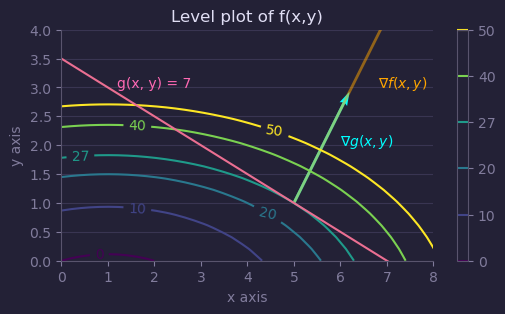

In [48]:
def f(x, y):
    return x**2 + 4*y**2 - 2*x + 8*y

def g(x):
    return 0.5*(-x + 7)

t = np.linspace(0,10)
x, y = np.meshgrid(t, t)
z = f(x, y)

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1,1,1)

# contours plot of f(x,y)
contours = ax.contour(x, y, z, levels=[0, 10, 20, 27, 40, 50])
ax.clabel(contours, inline=True, fontsize=10)
fig.colorbar(contours, ax = ax, orientation='vertical')

# constraint plot : g(x,y)
ax.plot(t, g(t))

# gradient direction grad(f), grad(g)
ax.quiver(float(x0), float(y0), float(g_grad_l0[0]), float(g_grad_l0[1]), scale=1, scale_units='xy', color='cyan')
ax.quiver(float(x0), float(y0), float(f_grad_l0[0]), float(f_grad_l0[1]), scale=1, scale_units='xy', color='orange', alpha=0.5)

# text helpers
ax.text(1.2,3, r'g(x, y) = 7', color='hotpink')
ax.text(6,2, r'$\nabla g(x,y)$', color='cyan')
ax.text(6.8,3, r'$\nabla f(x,y)$', color='orange')

# figure settings
ax.set_xlim(0, 8)
ax.set_ylim(0, 4)
ax.set_title('Level plot of f(x,y)')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis');

##### Example 2

**Optimizing Cobb-Douglas Function** <br>
- A company has determined that its production level is given by the Cobb-Douglas function: <br><br>
$f(x,y)=2.5x_0^{0.45} y_0^{0.55}$ <br><br>
where *x represents the total number of labor hours in 1 year* and *y represents the total capital input for the company*. <br><br>
- Suppose *1 unit of labor costs $40* and *1 unit of capital costs $50*. <br><br>
- Use the method of Lagrange multipliers to find the maximum value of f(x,y) subject to a budgetary constraint of $500,000 per year.

In [49]:
x, y, l = sp.symbols('x y l')
f = 2.5*x**(0.45) * y**(0.55)
g = 40*x + 50*y - 5e5

f_grad = [sp.diff(f, x), sp.diff(f, y)]
g_grad = [sp.diff(g, x), sp.diff(g, y)]

print('Gradient of f:')
for i in f_grad:
    display(i)
    
print('Gradient of g:')
for i in g_grad:
    display(i)    


Gradient of f:


1.125*y**0.55/x**0.55

1.375*x**0.45/y**0.45

Gradient of g:


40

50

In [50]:
expr = f_grad[0] / g_grad[0] - f_grad[1] / g_grad[1]
x_y = sp.solve(expr, x)[0]
print(f'x = {x_y}')

x = 1.02272727272727*y


In [51]:
y0 = sp.solve(g.subs({x:x_y}))[0]
x0 = x_y.subs({y:y0})
f_max = f.subs({x:x0, y:y0})
print(f'Total labor cost: ${x0}\nTotal capital Cost: ${y0}',
      f'\nMaximum production : {f_max}')

Total labor cost: $5625.00000000000
Total capital Cost: $5500.00000000000 
Maximum production : 13889.7562670823


In [52]:
f_grad_l0 = [i.subs({x:x0, y:y0}) for i in f_grad]
g_grad_l0 = [i.subs({x:x0, y:y0}) for i in g_grad]
print(
    f'gradient of f at lagrange point({x0:.2f}, {y0:.2f}) : {f_grad_l0}',
    f'\ngradient of g at lagrange point({x0:.2f}, {y0:.2f}) : {g_grad_l0}'
    )

gradient of f at lagrange point(5625.00, 5500.00) : [1.11118050136658, 1.38897562670823] 
gradient of g at lagrange point(5625.00, 5500.00) : [40, 50]


Checking if the obtained value is maximum by comparing at point on either side of lagrange point of constriant equation:

In [53]:
p1 = sp.solve(g.subs({y:5000}))[0]
p2 = sp.solve(g.subs({x:5000}))[0]

print(
    f'value of function at P({p1:.2f},5000): {f.subs({x:p1, y:5000})}',
    f'\nvalue of function at P(5000, {p2:.2f}): {f.subs({x:5000, y:p2})}'
)

value of function at P(6250.00,5000): 13820.3651853358 
value of function at P(5000, 6000.00): 13818.4616737019


In [54]:
def f(x,y):
    x = np.power(x, 0.45, dtype=np.complex128)
    y = np.power(y, 0.55, dtype=np.complex128)
    return np.real(2.5 * x * y)

def g(x):
    return -0.8*x + 1e4

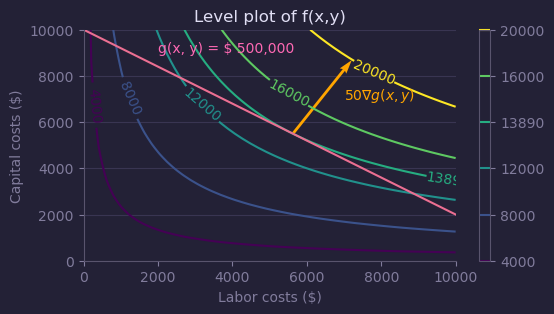

In [55]:
t = np.linspace(0,10000)
x, y = np.meshgrid(t, t)
z = f(x,y)

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1,1,1)

# contours plot of f(x,y)
levels = np.linspace(4000, 20000, 5)
levels = np.sort(np.append(levels, float(f_max)))
contours = ax.contour(x, y, z, levels)
ax.clabel(contours, inline=True, fontsize=10)
fig.colorbar(contours, ax = ax, orientation='vertical')

# constraint plot : g(x,y)
ax.plot(t, g(t))

# gradient direction (note scaled version (x50) is plotted to see in figure)
ax.quiver(float(x0), float(y0),
          float(g_grad_l0[0])*50, float(g_grad_l0[1])*50, 
          scale=1, scale_units='xy', color='orange')

# text helpers
ax.text(2000, 9000, r'g(x, y) = $ 500,000', color='hotpink')
ax.text(7000, 7000, r'$50 \nabla g(x,y)$', color='orange')

# figure settings
ax.set_title('Level plot of f(x,y)')
ax.set_xlabel('Labor costs ($)')
ax.set_ylabel('Capital costs ($)');

*Lagrange Multipliers with a Three-Variable objective function**:<br><br>
$ \nabla f(x,y,z) = \lambda \nabla g(x, y, z) \\[1em]
g(x,y,z) = k
$

#### Problems with Two Constraints

Let $w = f(x, y, z)$ be the objective function subject to two constraints : $g(x,y,z) = 0$  and $h(x,y,z)=0$. Then for two lagrange multipliers $\lambda_1$ and $\lambda_2$ the following is true:<br><br>
$\nabla f(x_0,y_0,z_0) = \lambda_1 \nabla g(x_0,y_0,z_0) + \lambda_2 \nabla h(x_0,y_0,z_0)$

In [56]:
x,y,z,l1,l2 = sp.symbols('x,y,z,l1,l2')
f = x**2 + y**2 + z**2
g = 2*x + y + 2*z - 9
h = 5*x + 5*y + 7*z - 29

f_grad = [sp.diff(f,x), sp.diff(f,y), sp.diff(f,z)]
g_grad = [sp.diff(g,x), sp.diff(g,y), sp.diff(g,z)]
h_grad = [sp.diff(h,x), sp.diff(h,y), sp.diff(h,z)]

print(f'gradient of f: {f_grad}\ngradient of g: {g_grad}\ngradient of h: {h_grad}')

gradient of f: [2*x, 2*y, 2*z]
gradient of g: [2, 1, 2]
gradient of h: [5, 5, 7]


Vectorizing the equation in matrix form:
- First three rows consist of equation: $\nabla f(x_0,y_0,z_0) = \lambda_1 \nabla g(x_0,y_0,z_0) + \lambda_2 \nabla h(x_0,y_0,z_0)$ in vector form.
- Last two rows are g and h coefficents.

In [57]:
A = sp.Matrix([
    [2, 0, 0, -2, -5],
    [0, 2, 0, -1, -5],
    [0, 0, 2, -2, -7],
    [2, 1, 2, 0, 0],
    [5, 5, 7, 0, 0] 
])

B = sp.Matrix([0, 0, 0, 9, 29])
A.inv()@B

Matrix([
[2],
[1],
[2],
[2],
[0]])

In [58]:
print(f'minimum value of f: {f.subs({x:2, y:1, z:2})}')

minimum value of f: 9
